In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

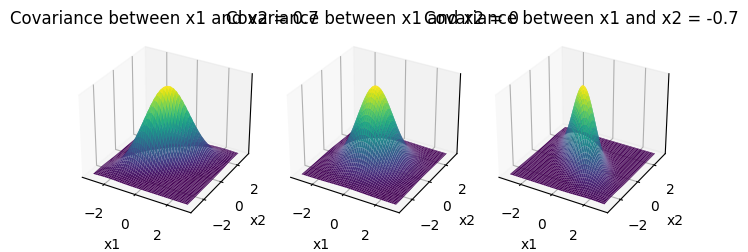

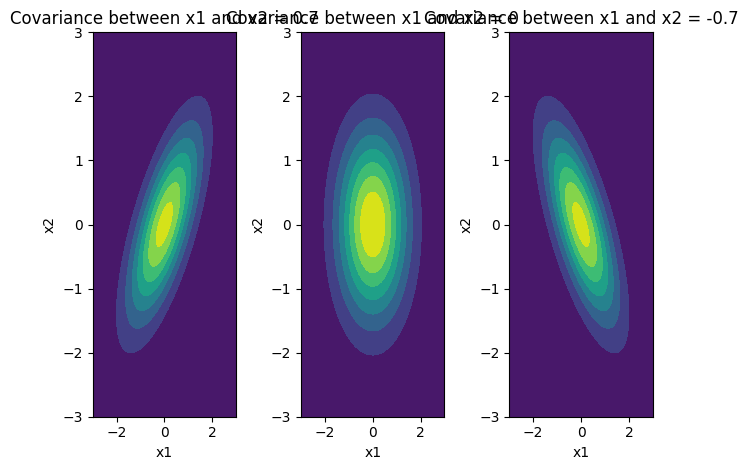

In [2]:
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
cov_val = [0.7, 0, -0.7]

# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])

# Storing density function values for
# further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):

    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])

    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)

    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]

    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)

    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()

<ipython-input-3-e3e3cbcf98a2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


data.shape = (1000, 2)
data.shape = (1000, 2)
data.shape = (1000, 2)


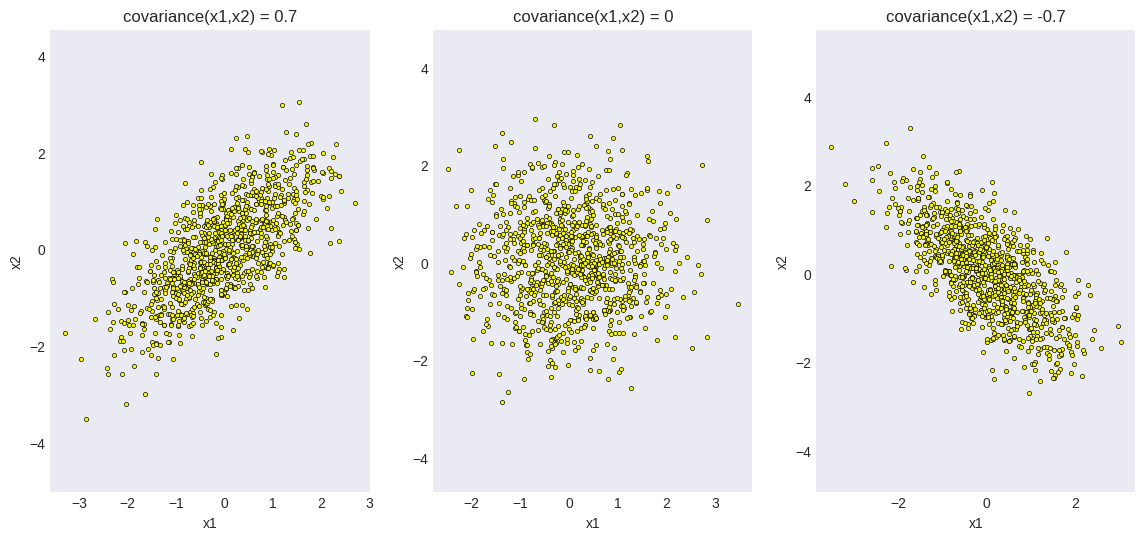

In [3]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6

for idx, cov in enumerate([0.7, 0, -0.7]):
  covar = np.array([
      [1.0, cov],
      [cov, 1.0]
  ])

  # get a 2-d Gaussian distribution function
  distr = multivariate_normal(cov=covar, mean=[0,0], seed=47)

  # draw 1000 samples from the distribution
  data = distr.rvs(size=1000)
  print("data.shape =", data.shape)

  # Plotting the generated samples
  plt.subplot(1,3,idx+1)
  plt.plot(data[:,0], data[:,1], '.', c='yellow', markeredgewidth=0.5, markeredgecolor='black')
  plt.title(f'covariance(x1,x2) = {cov}')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.axis('equal')

plt.show()

data.shape = (2000, 2)


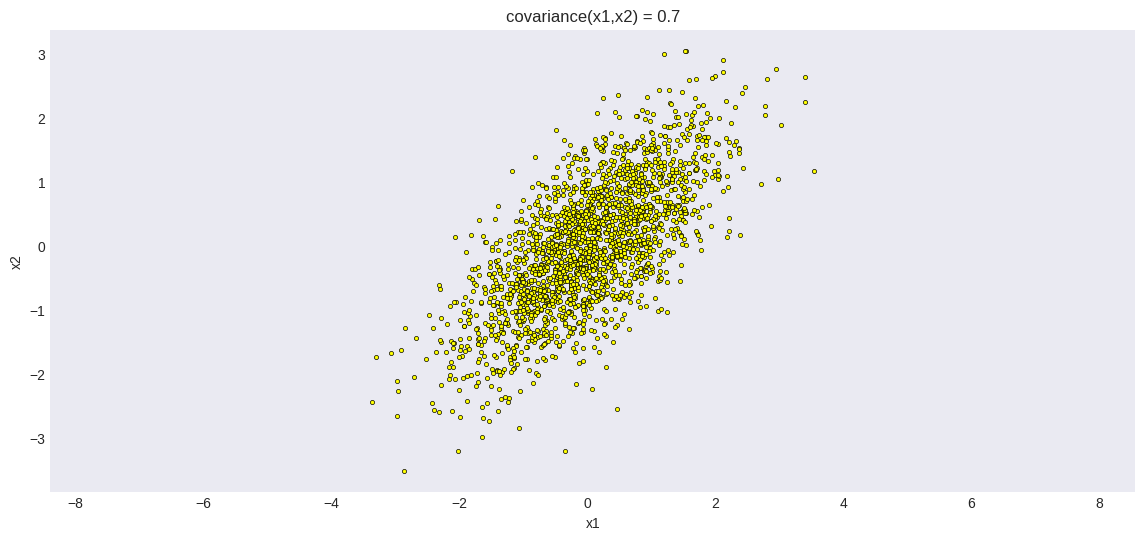

In [4]:
covar = np.array([
    [1.0, 0.7],
    [0.7, 1.0]
])

# get a 2-d Gaussian distribution function
distr = multivariate_normal(cov=covar, mean=[0,0], seed=47)

# draw 1000 samples from the distribution
data = distr.rvs(size = 2000)
print("data.shape =", data.shape)

# Plotting the generated samples
plt.plot(data[:,0], data[:,1], '.', c='yellow', markeredgewidth=0.5, markeredgecolor='black')
plt.title('covariance(x1,x2) = 0.7')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

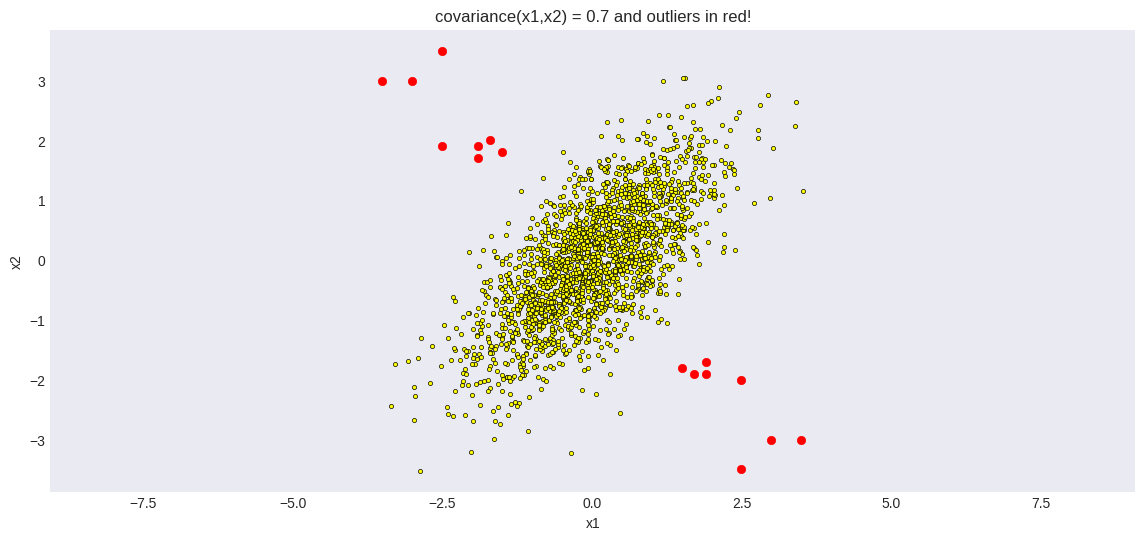

In [5]:
outliers = np.array([
    [-1.9, 1.9],
    [-2.5, 1.9],
    [-1.9, 1.7],
    [-1.7, 2],
    [-1.5, 1.8],
    [-3, 3],
    [-2.5, 3.5],
    [-3.5, 3],
    [3, -3],
    [2.5, -3.5],
    [3.5, -3],
    [1.9, -1.9],
    [2.5, -2],
    [1.9, -1.7],
    [1.7, -1.9],
    [1.5, -1.8],
])

# Plotting the samples and outliers
plt.plot(data[:,0], data[:,1], '.', c='yellow', markeredgewidth=0.5, markeredgecolor='black')
plt.plot(outliers[:,0], outliers[:,1], 'o', c='red', markeredgewidth=0.5, markeredgecolor='red')
plt.title('covariance(x1,x2) = 0.7 and outliers in red!')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

Remove univariate points which are more than 2-stdev away (z-score)

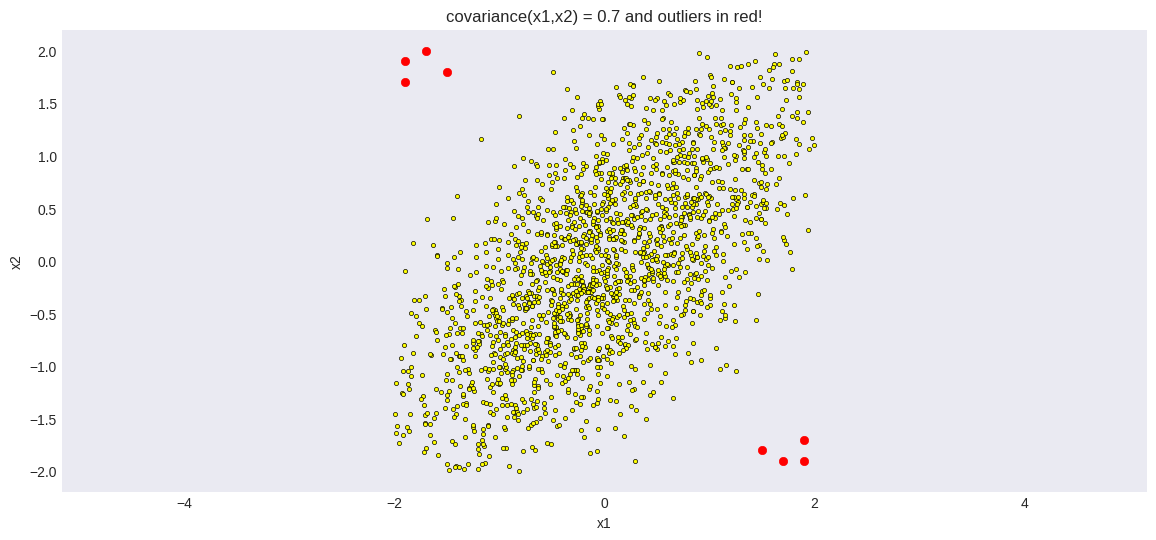

In [6]:
# all cols are already scaled to have stdev=1
# hence, a z-score of 2 for each col is at value 2 only
indexes = (np.abs(data) <= 2).all(axis=1)
data = data[indexes]

indexes = (np.abs(outliers) <= 2).all(axis=1)
outliers = outliers[indexes]

# Plotting the samples and outliers
plt.plot(data[:,0], data[:,1], '.', c='yellow', markeredgewidth=0.5, markeredgecolor='black')
plt.plot(outliers[:,0], outliers[:,1], 'o', c='red', markeredgewidth=0.5, markeredgecolor='red')
plt.title('covariance(x1,x2) = 0.7 and outliers in red!')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [7]:
# add both outliers and data in the same array
data = np.vstack([data, outliers])
print("data.shape =", data.shape)

data.shape = (1859, 2)


In [8]:
# function to calculate the Mahalanobis distance
def calculateMahalanobis(data=None, cov=None):
    """ function to calculate Mahalanobis distance """

    data_mu = data - np.mean(data, axis=0)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    mahalanobis = np.einsum('ij,jk,ki->i', data_mu, inv_covmat, data_mu.T)
    return mahalanobis

X = pd.DataFrame(data, columns=["x1", "x2"])

# column 'mahalanobis' now contains the distance metric.
X['mahalanobis'] = calculateMahalanobis(data=X)

# calculate p-value corresponding to each mahalanobis distance
X['p'] = 1 - scipy.stats.chi2.cdf(X['mahalanobis'], X.shape[1]-1)

# drop rows where p-value <= 0.1
X = X[X.p > 0.1]

# drop the cols which are not required now
X = X.drop(columns=["p", "mahalanobis"])
print("X.shape=", X.shape)

X.shape= (1707, 2)


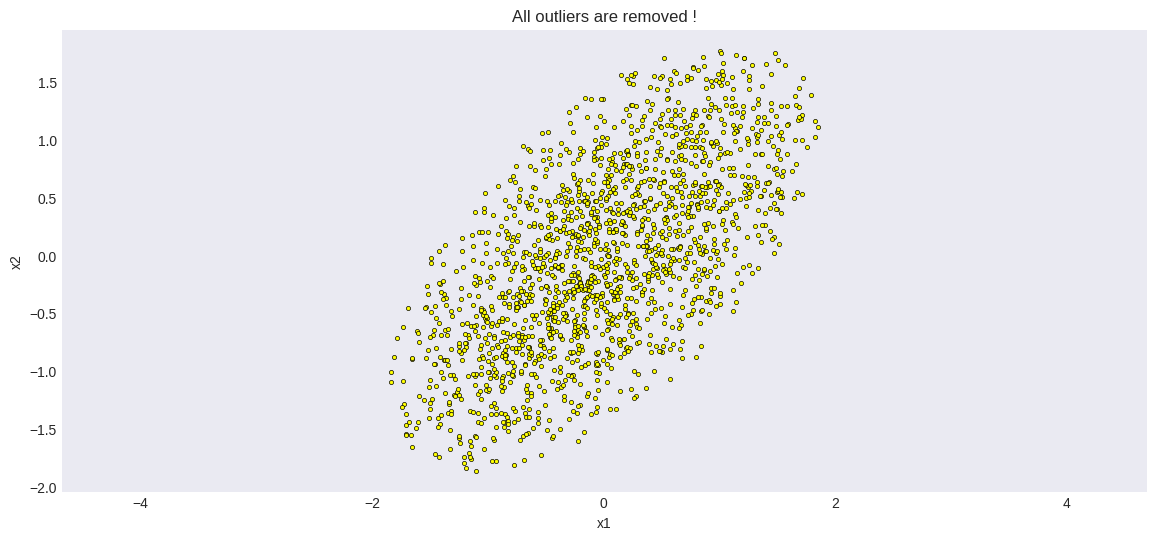

In [9]:
# Plotting the samples and outliers
data = X.values
plt.plot(data[:,0], data[:,1], '.', c='yellow', markeredgewidth=0.5, markeredgecolor='black')
plt.title('All outliers are removed !')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()